# Code for the article "Morphological Feature Extraction for Language Identification: A Comprehensive Study"

Importing libraries

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from collections import Counter
import operator
import codecs
import re
import pandas as pd
from scipy.stats import entropy
from itertools import product 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud 

text preparation

In [2]:
fileObj = codecs.open("data/voynich.txt", "rb", "utf_8_sig")
text = fileObj.read()
text= text.replace(u'\xa0', u' ')
#text=text.replace(" ", "")
#text=text.replace("\r\n", "")
#my_new_string=(re.sub("[^a-zA-Z]"," ",text))
#text=text.lower()#
fileObj.close()

In [3]:
def binary_seq(text):
    text1=text.replace("\r\n", "")
    #text1=text1.replace(" ", "")
    #my_new_string = re.sub('[–-]', '', text1)
    #text1 = re.sub('[–~!,@#$%^&*()-_+=:;\'\",./? ]', '', text1)
    my_new_string=(re.sub("[^a-zA-Z]"," ",text1))
    my_new_string=(re.sub("\s{2,}"," ",my_new_string))
    my_new_string2=my_new_string.lower()
    #my_new_string2=re.sub('[^0]', '1', my_new_string)
    #my_new_string3=re.sub('0+', '0', my_new_string2)
    return my_new_string2

In [4]:
text=binary_seq(text)

In [5]:
text

'fachys ykal cphoy oydar ytain shoshy cphodales oksho kshoy otairin daicthy yto shol she kodshey cphealy dasain dain ckhyds dchar shcthaiin okaiir chey rchy tshodeesy shey chtor eo lkody okodar ckholsy dorchory chaindy chtod dy cphy dals chokaiin fodan yksh olsheey daiildy dlssho kol sheey qokey ykody so otchom oporar oteol chol s cheol ekshy qokeom qokol daiin soleeg soeom qotoy sha cpholdy pchooiin ksheo kchoy chopchy dolds dlod ol chey cphydy olaen qooko iiincheom chcthy qoty kshody fchoy chkoy pshod chols chots ychopordg chckh chopchol poeear kshor cshe chodam cheey ol cheol dy choteeen oeear choschy shesed chofchy tosh ckcheey koltoldy chey kshey lody cholal rol dal shear cheeotaiin chal okchody toeoky ram yshy chokcho chcthod ot dy pshoain cthyaiin okaiir chtchor doiir schold torshor opchy shol dy qopchy shol opchor dypchy dchm dydydy chckhy dchyd dardy chokshor ychykchy otly toror dalydal chcthody cphod qodcthy ods qor olaiin opydg som ypchy ypaim cphoy daror chokoaiin cpy cheee

## Creation of PMI matrix and its visualisation

In [7]:
pmi_dict = {}

# Visualize the PMI matrix
def pmi(text):
    # Create a dictionary with the frequencies of all letters in the text
    letter_counts = Counter(text)
    # Calculate the total number of letters in the text
    total_letters = sum(letter_counts.values())
    # Create a dictionary where keys are letter pairs, and values are their frequencies
    letter_pairs = Counter(zip(text, text[1:]))
    # Calculate pointwise mutual information (PMI) for each letter pair

    for pair, count in letter_pairs.items():
        # Exclude space characters from the pairs
        if ' ' not in pair:
            first_letter_count = letter_counts[pair[0]]
            second_letter_count = letter_counts[pair[1]]
            p_pair = count / total_letters
            p_first = first_letter_count / total_letters
            p_second = second_letter_count / total_letters
            pmi_value = math.log2(p_pair / (p_first * p_second))
            pmi_dict[pair] = pmi_value
            print(f"PMI({pair[0]},{pair[1]}) = {pmi_value:.2f}")

    # Create the PMI matrix
    letters = sorted(list(set(text)))
    n = len(letters)
    pmi_matrix = np.zeros((n, n))
    for i, letter1 in enumerate(letters):
        for j, letter2 in enumerate(letters):
            pair = (letter1, letter2)
            pmi_matrix[i, j] = pmi_dict.get(pair, pmi_dict.get((letter2, letter1), 0))
            '''
            if pair in pmi_dict:
                pmi_matrix[i, j] = pmi_dict[pair]
            else:
                pmi_matrix[i, j] = pmi_dict[(letter2, letter1)]'''

    # Visualize the PMI matrix
    fig, ax = plt.subplots(figsize=(20, 20))
    im = ax.imshow(pmi_matrix, cmap='coolwarm')
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(letters)
    ax.set_yticklabels(letters)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    for i in range(n):
        for j in range(n):
            text = ax.text(j, i, f"{pmi_matrix[i, j]:.2f}", ha="center", va="center", color="black")
    ax.set_title("PMI matrix")
    fig.tight_layout()
    plt.show()

PMI(f,a) = 1.38
PMI(a,c) = -6.48
PMI(c,h) = 3.58
PMI(h,y) = 0.22
PMI(y,s) = -2.17
PMI(y,k) = -1.08
PMI(k,a) = 2.45
PMI(a,l) = 2.35
PMI(c,p) = 0.98
PMI(p,h) = 0.45
PMI(h,o) = -0.18
PMI(o,y) = -4.70
PMI(y,d) = -3.70
PMI(d,a) = 1.83
PMI(a,r) = 3.07
PMI(y,t) = -0.48
PMI(t,a) = 2.29
PMI(a,i) = 3.35
PMI(i,n) = 4.45
PMI(s,h) = 3.28
PMI(o,s) = -1.03
PMI(o,d) = -0.05
PMI(l,e) = -4.58
PMI(e,s) = -0.94
PMI(o,k) = 2.62
PMI(k,s) = -0.99
PMI(o,t) = 2.66
PMI(i,r) = 0.92
PMI(r,i) = -4.53
PMI(i,c) = -6.46
PMI(c,t) = 0.87
PMI(t,h) = 0.40
PMI(t,o) = -0.50
PMI(o,l) = 2.24
PMI(h,e) = 2.52
PMI(k,o) = -1.47
PMI(d,s) = -1.29
PMI(e,y) = 1.21
PMI(e,a) = -1.78
PMI(l,y) = -0.89
PMI(a,s) = -2.38
PMI(s,a) = 0.66
PMI(c,k) = 0.60
PMI(k,h) = 0.13
PMI(d,c) = -1.74
PMI(h,a) = -1.21
PMI(h,c) = 0.07
PMI(i,i) = 2.98
PMI(r,c) = -1.26
PMI(t,s) = -0.23
PMI(d,e) = -3.84
PMI(e,e) = 1.27
PMI(s,y) = -3.13
PMI(h,t) = -2.33
PMI(o,r) = 1.51
PMI(e,o) = 0.07
PMI(l,k) = 1.32
PMI(d,y) = 3.00
PMI(l,s) = 0.64
PMI(d,o) = -2.08
PMI(r,y) = -

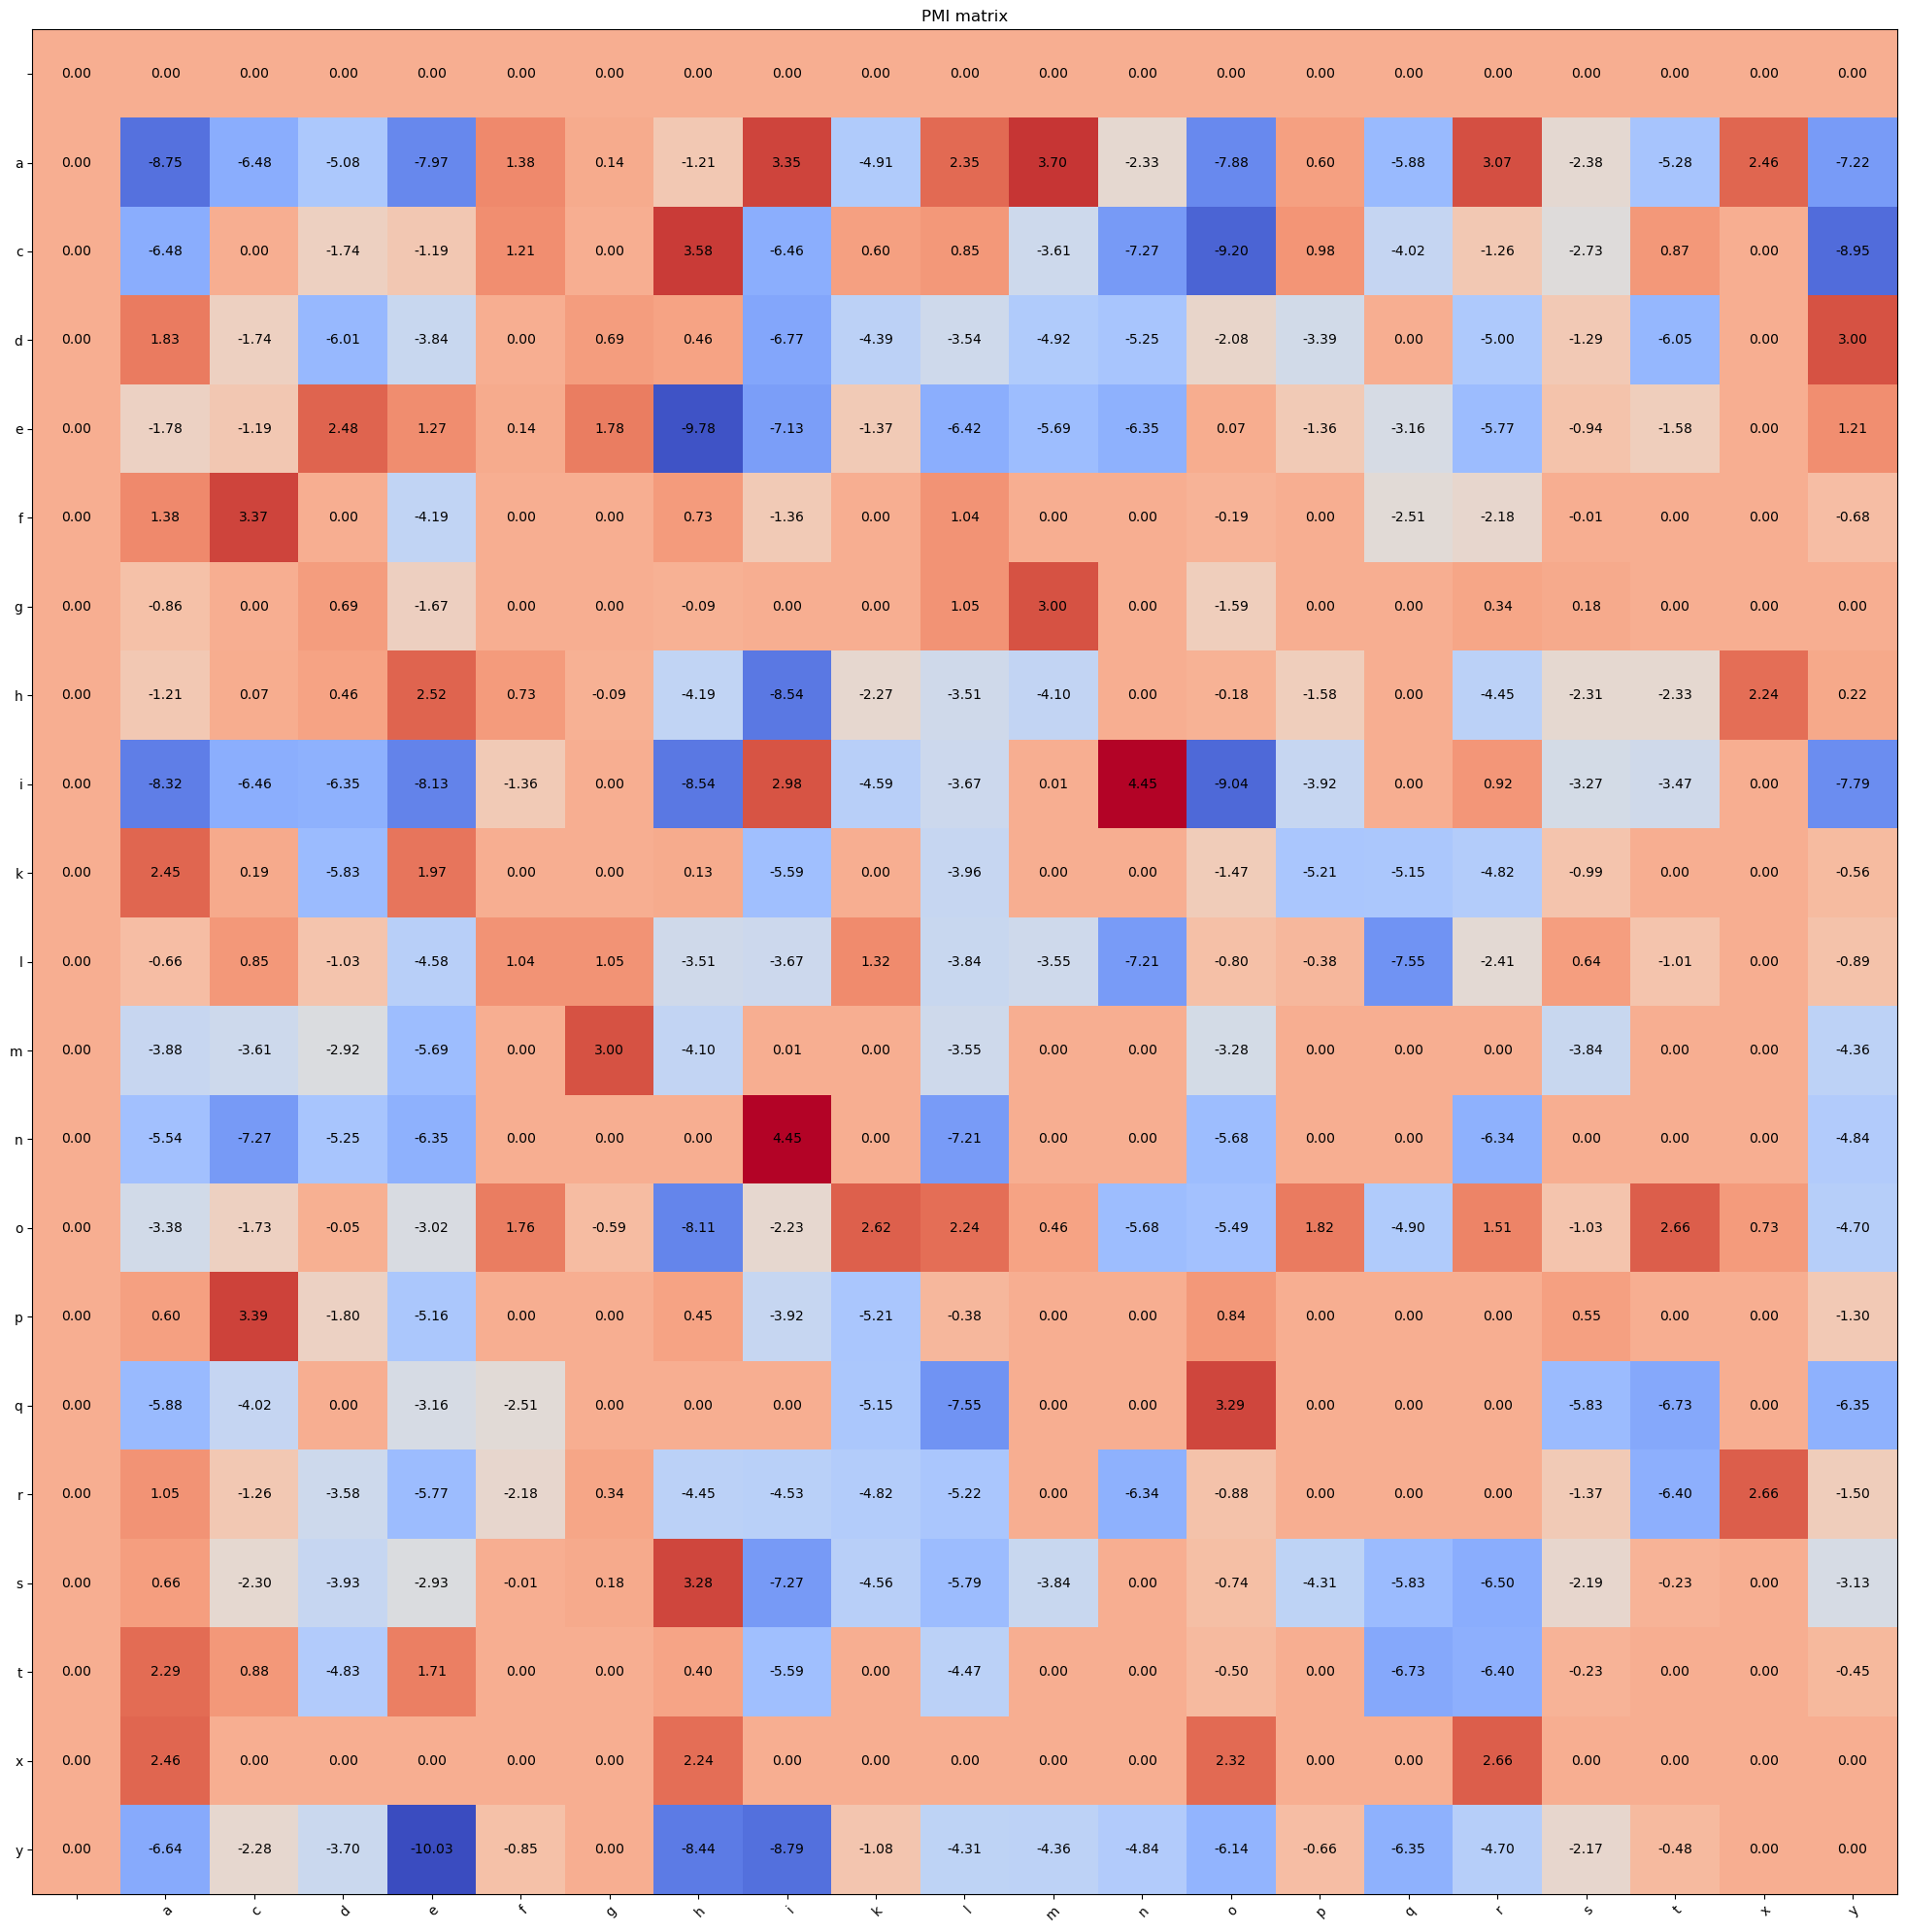

In [8]:
pmi(text)

In [9]:
# Sort the dictionary in descending order of PMI values
sorted_pmi_dict = {k: v for k, v in sorted(pmi_dict.items(), key=lambda item: item[1], reverse=True)}

# Filter out pairs with PMI value less than or equal to 2
filtered_pmi_dict = {k: v for k, v in sorted_pmi_dict.items() if v > 1}

In [10]:
filtered_pmi_dict

{('i', 'n'): 4.453039042943428,
 ('a', 'm'): 3.70262163960997,
 ('c', 'h'): 3.581542414734331,
 ('p', 'c'): 3.389903815683472,
 ('f', 'c'): 3.368656081979433,
 ('a', 'i'): 3.346659081795687,
 ('q', 'o'): 3.290684787788369,
 ('s', 'h'): 3.279366494300307,
 ('a', 'r'): 3.0652356172752238,
 ('d', 'y'): 3.0037637110372057,
 ('g', 'm'): 2.999690747240914,
 ('i', 'i'): 2.976954067087423,
 ('r', 'x'): 2.657248378694706,
 ('o', 't'): 2.656713714471433,
 ('o', 'k'): 2.6224832288666837,
 ('h', 'e'): 2.5235547771862645,
 ('e', 'd'): 2.4838397075190026,
 ('x', 'a'): 2.4575091417734383,
 ('k', 'a'): 2.450979570551528,
 ('a', 'l'): 2.3459962530694463,
 ('x', 'o'): 2.3196411926878335,
 ('t', 'a'): 2.2875278367410203,
 ('o', 'l'): 2.2382482923601774,
 ('h', 'x'): 2.2364278244388522,
 ('k', 'e'): 1.965338743915117,
 ('d', 'a'): 1.83105134426834,
 ('o', 'p'): 1.8178541748139185,
 ('e', 'g'): 1.7846031265276991,
 ('o', 'f'): 1.7597696729295078,
 ('t', 'e'): 1.7122674912075517,
 ('o', 'r'): 1.511817939173

In [11]:
# Create a list of bigrams represented as strings
bigrams = ["".join(k) for k in filtered_pmi_dict.keys()]

# Print the list of bigrams
print(bigrams)

['in', 'am', 'ch', 'pc', 'fc', 'ai', 'qo', 'sh', 'ar', 'dy', 'gm', 'ii', 'rx', 'ot', 'ok', 'he', 'ed', 'xa', 'ka', 'al', 'xo', 'ta', 'ol', 'hx', 'ke', 'da', 'op', 'eg', 'of', 'te', 'or', 'fa', 'lk', 'ee', 'cf', 'ey', 'lg', 'ra', 'lf']


Calculation of trigrams by a pair of previously selected bigrams + letters

In [13]:
pmi_dict = {}
for pair, count in letter_pairs_with_single_letter.items():
    if ' ' not in pair:
        first_letter_count = letter_counts[pair[0]]
        second_letter_count = letter_counts[pair[1]]
        single_letter_count = letter_counts[pair[2]]
        p_pair_single = count / total_letters
        p_pair = letter_pairs[(pair[0], pair[1])] / total_letters
        p_first = first_letter_count / total_letters
        p_second = second_letter_count / total_letters
        p_single = single_letter_count / total_letters
        pmi_value = math.log2((p_pair_single / (p_pair * p_single)))
        pmi_dict[pair] = pmi_value
        if ''.join(pair[:2]) in bigrams:
            print(f"PMI({pair[0]}{pair[1]},{pair[2]}) = {pmi_value:.2f}")

PMI(fa,c) = -0.44
PMI(ch,y) = -0.88
PMI(ka,l) = 2.18
PMI(da,r) = 3.17
PMI(ta,i) = 3.27
PMI(ai,n) = 3.90
PMI(sh,o) = -0.36
PMI(sh,y) = -1.46
PMI(da,l) = 2.34
PMI(al,e) = -6.53
PMI(ok,s) = -1.47
PMI(ot,a) = 2.59
PMI(ai,r) = 1.33
PMI(da,i) = 3.33
PMI(ai,c) = -5.77
PMI(sh,e) = 2.82
PMI(he,y) = 1.10
PMI(he,a) = -1.44
PMI(al,y) = -0.10
PMI(da,s) = -2.20
PMI(ch,a) = -1.10
PMI(sh,c) = 0.02
PMI(ai,i) = 3.53
PMI(ii,n) = 5.14
PMI(ok,a) = 2.65
PMI(ka,i) = 3.61
PMI(ii,r) = -0.30
PMI(ch,e) = 2.53
PMI(ee,s) = -0.04
PMI(ch,t) = -1.97
PMI(lk,o) = -2.03
PMI(ok,o) = -1.49
PMI(ol,s) = 0.40
PMI(or,c) = -0.83
PMI(ch,o) = -0.02
PMI(or,y) = -2.21
PMI(in,d) = -5.55
PMI(al,s) = -0.67
PMI(da,n) = -3.36
PMI(he,e) = 0.45
PMI(ee,y) = 2.16
PMI(ii,l) = -4.17
PMI(qo,k) = 3.56
PMI(ok,e) = 2.13
PMI(ke,y) = -0.16
PMI(ot,c) = 0.67
PMI(op,o) = 0.13
PMI(or,a) = 1.00
PMI(ra,r) = 2.45
PMI(ot,e) = 1.93
PMI(te,o) = 0.27
PMI(he,o) = 0.45
PMI(ke,o) = -0.47
PMI(ol,e) = -3.90
PMI(ee,g) = 1.87
PMI(qo,t) = 2.77
PMI(ot,o) = -0.79
PMI(

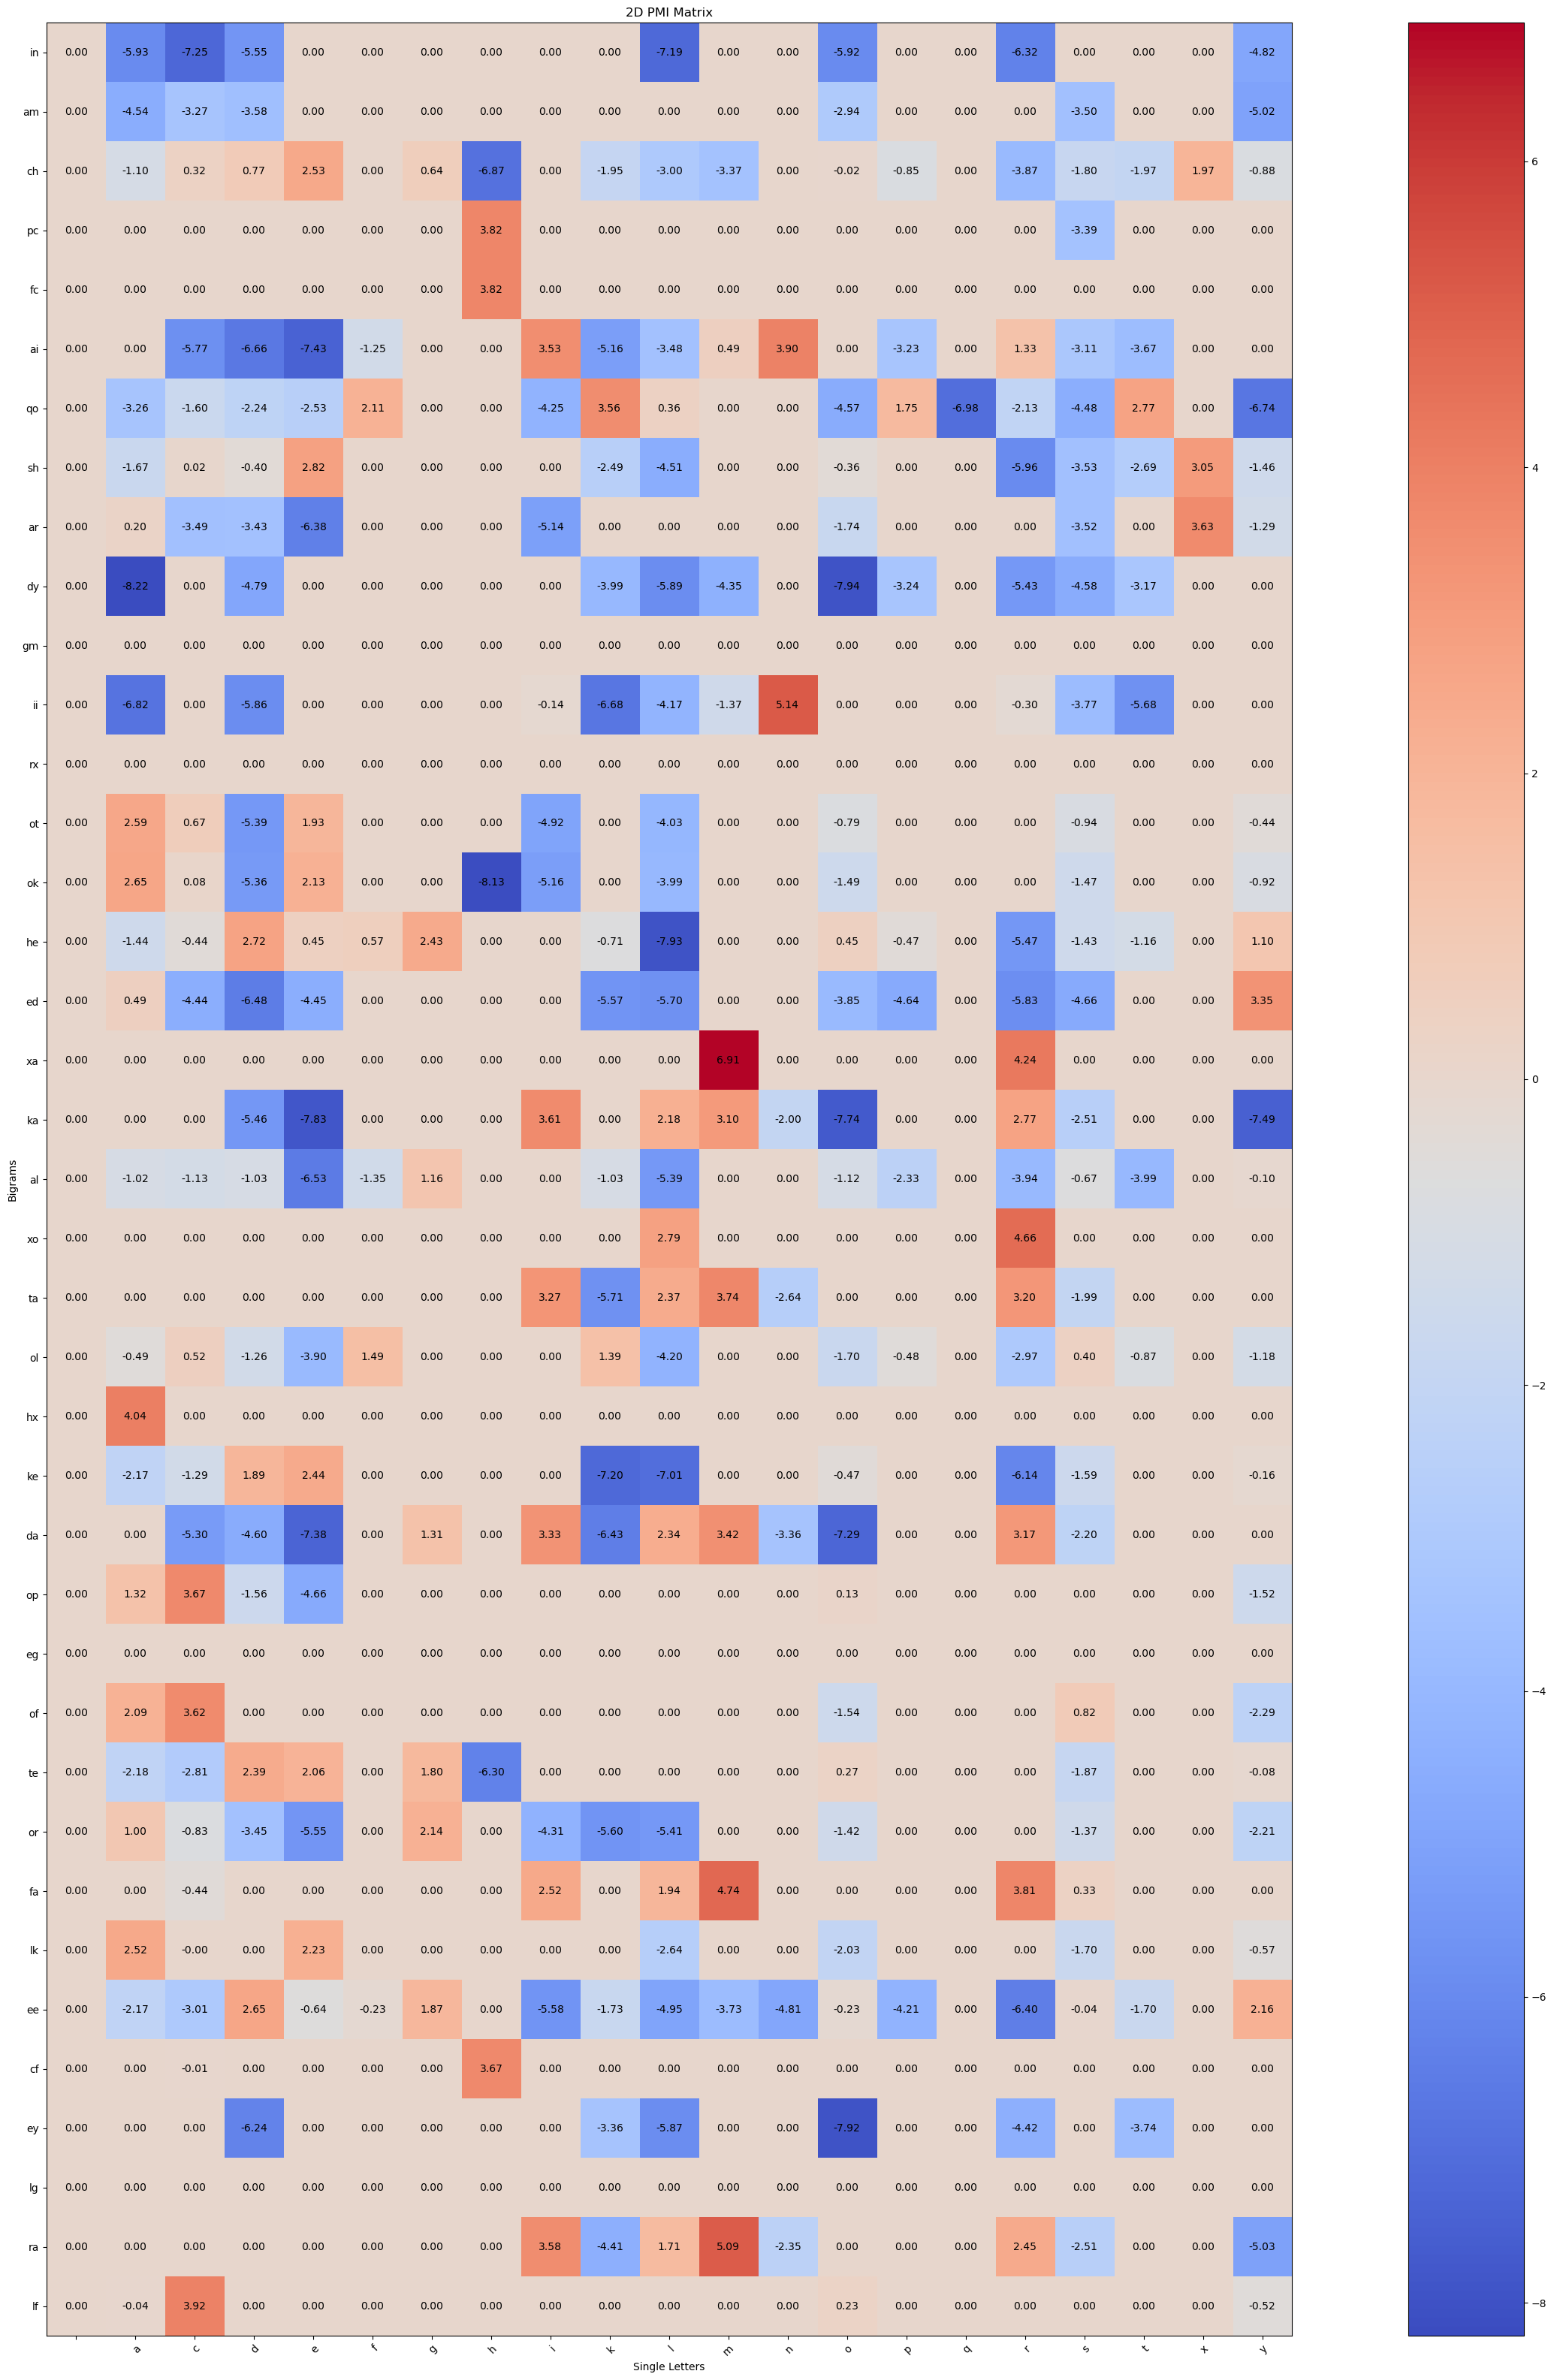

In [14]:
# Get the list of single letters in the text
single_letters = sorted(list(set(text)))

# Create a list of bigram labels in the format "{pair[0]}{pair[1]}"
bigram_labels = [bigram for bigram in bigrams]

# Create a 2D PMI matrix for bigrams (y-axis) and single letters (x-axis)
pmi_matrix_2d = np.zeros((len(bigram_labels), len(single_letters)))

for i, bigram in enumerate(bigram_labels):
    for j, single_letter in enumerate(single_letters):
        pair = (bigram[0], bigram[1], single_letter)
        pmi_matrix_2d[i, j] = pmi_dict.get(pair, 0)

# Visualize the 2D PMI matrix
fig, ax = plt.subplots(figsize=(40, 40))
im = ax.imshow(pmi_matrix_2d, cmap='coolwarm')
ax.set_xticks(np.arange(len(single_letters)))
ax.set_yticks(np.arange(len(bigram_labels)))
ax.set_xticklabels(single_letters)
ax.set_yticklabels(bigram_labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(bigram_labels)):
    for j in range(len(single_letters)):
        text = ax.text(j, i, f"{pmi_matrix_2d[i, j]:.2f}", ha="center", va="center", color="black")

ax.set_xlabel('Single Letters')
ax.set_ylabel('Bigrams')
ax.set_title("2D PMI Matrix")
plt.colorbar(im)
plt.show()

In [15]:
# Sort the dictionary in descending order of PMI values
sorted_pmi_dict2 = {k: v for k, v in sorted(pmi_dict.items(), key=lambda item: item[1], reverse=True)}

# Filter out pairs with PMI value less than or equal to 2
filtered_pmi_dict2 = {k: v for k, v in sorted_pmi_dict2.items() if v > 1}
filtered_pmi_dict2={k1:v1 for k1, v1 in filtered_pmi_dict2.items() for k2 in filtered_pmi_dict.keys() if k1[:2]==k2}

In [16]:
filtered_pmi_dict2

{('x', 'a', 'm'): 6.9065813428494325,
 ('i', 'i', 'n'): 5.142866851459519,
 ('r', 'a', 'm'): 5.0917513002296815,
 ('f', 'a', 'm'): 4.736656341407119,
 ('x', 'o', 'r'): 4.657248378694706,
 ('x', 'a', 'r'): 4.242210879415862,
 ('h', 'x', 'a'): 4.042471642494594,
 ('l', 'f', 'c'): 3.923752042789686,
 ('a', 'i', 'n'): 3.9040217931861325,
 ('f', 'c', 'h'): 3.8213903251600083,
 ('p', 'c', 'h'): 3.817332108585655,
 ('f', 'a', 'r'): 3.809251472139756,
 ('t', 'a', 'm'): 3.744237520391522,
 ('o', 'p', 'c'): 3.6733452452836417,
 ('c', 'f', 'h'): 3.6693872317149583,
 ('a', 'r', 'x'): 3.634484403914077,
 ('o', 'f', 'c'): 3.6227191722136736,
 ('k', 'a', 'i'): 3.6099099539400434,
 ('r', 'a', 'i'): 3.5767179392971813,
 ('q', 'o', 'k'): 3.560689385729364,
 ('a', 'i', 'i'): 3.527031091911089,
 ('d', 'a', 'm'): 3.423917417974418,
 ('e', 'd', 'y'): 3.349845601752721,
 ('d', 'a', 'i'): 3.3301628527200346,
 ('t', 'a', 'i'): 3.2687042274626084,
 ('t', 'a', 'r'): 3.2036956438108097,
 ('d', 'a', 'r'): 3.169422

In [18]:
# Create a list of trigrams represented as strings
bigrams2 = ["".join(k) for k in filtered_pmi_dict2.keys()]

# Print the list of trigrams
print(bigrams2)

['xam', 'iin', 'ram', 'fam', 'xor', 'xar', 'hxa', 'lfc', 'ain', 'fch', 'pch', 'far', 'tam', 'opc', 'cfh', 'arx', 'ofc', 'kai', 'rai', 'qok', 'aii', 'dam', 'edy', 'dai', 'tai', 'tar', 'dar', 'kam', 'shx', 'she', 'xol', 'qot', 'kar', 'hed', 'eed', 'oka', 'ota', 'che', 'fai', 'lka', 'rar', 'kee', 'heg', 'ted', 'tal', 'dal', 'lke', 'kal', 'eey', 'org', 'oke', 'qof', 'ofa', 'tee', 'chx', 'fal', 'ote', 'ked', 'eeg', 'teg', 'qop', 'ral', 'olf', 'olk', 'air', 'opa', 'dag', 'alg', 'hey', 'ora']


## creation of NaiveDiscriminativeLearning class

In [23]:
class NaiveDiscriminativeLearning:
    def __init__(self, alpha=1, beta=1):
        # Initialize dictionaries to store class and feature counts
        self.class_counts = {}
        self.feature_counts = {}
        # Set alpha and beta hyperparameters
        self.alpha = alpha
        self.beta = beta

    def train(self, text):
        # Split the text into letter pairs
        letter_pairs = [text[i:i+2] for i in range(len(text)-1) if ' ' not in text[i:i+2]]

        # Count the occurrences of each letter pair in the text
        pair_counts = Counter(letter_pairs)

        # Update class and feature counts based on the observed pairs in the text
        for pair, count in pair_counts.items():
            if pair in self.feature_counts:
                self.feature_counts[pair] += count
            else:
                self.feature_counts[pair] = count

            if pair in self.class_counts:
                self.class_counts[pair] += count
            else:
                self.class_counts[pair] = count

    def predict(self, text):
        # Split the text into letter pairs
        letter_pairs = [text[i:i+2] for i in range(len(text)-1) if ' ' not in text[i:i+2]]

        # Calculate probabilities for each letter pair
        probabilities = {}
        for pair in letter_pairs:
            if pair in self.feature_counts:
                feature_count = self.feature_counts[pair]
                class_count = self.class_counts[pair]
                total_class_count = sum(self.class_counts.values())
                probability = (feature_count + self.alpha) / (class_count + self.beta * total_class_count)
            else:
                probability = self.alpha / (self.beta * total_class_count)
            probabilities[pair] = probability

        return probabilities

def grid_search(alpha_values, beta_values, train_text, test_text):
    # Initialize variables to store the best hyperparameters and score
    best_alpha = None
    best_beta = None
    best_score = -1

    # Iterate over all combinations of alpha and beta values
    for alpha, beta in product(alpha_values, beta_values):
        # Create an instance of NaiveDiscriminativeLearning with current hyperparameters
        ndl = NaiveDiscriminativeLearning(alpha=alpha, beta=beta)
        # Train the model with the training text
        ndl.train(train_text)

        # Predict probabilities for the test text using the trained model
        predicted_probabilities = ndl.predict(test_text)

        # Calculate the average probability for the predicted probabilities
        avg_probability = sum(predicted_probabilities.values()) / len(predicted_probabilities)

        # If a better score is found, update the best hyperparameters and score
        if avg_probability > best_score:
            best_alpha = alpha
            best_beta = beta
            best_score = avg_probability

    # Return the best hyperparameters and score
    return best_alpha, best_beta, best_score

In [24]:
# Splitting the text into training and test parts (80% for training, 20% for testing)
train_text = text[:int(len(text) * 0.8)]  # Training portion of the text
test_text = text[int(len(text) * 0.8):]   # Testing portion of the text

# Create an instance of the NaiveDiscriminativeLearning class
alpha_values = [0.1, 0.5, 1.0]   # Hyperparameter values for alpha
beta_values = [0.1, 0.5, 1.0]    # Hyperparameter values for beta

# Perform grid search to find the best alpha and beta values using the training data
best_alpha, best_beta, best_score = grid_search(alpha_values, beta_values, train_text, test_text)

# Create an instance of the NaiveDiscriminativeLearning class with the optimal alpha and beta values
ndl_optimal = NaiveDiscriminativeLearning(alpha=best_alpha, beta=best_beta)

# Train the model on the training data using the optimal hyperparameters
ndl_optimal.train(train_text)

# Predict probabilities for the test data using the optimized model
predicted_probabilities = ndl_optimal.predict(test_text)

# Output the results in descending order of probabilities
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)
for pair, probability in sorted_probabilities:
    print(f"{pair}: {probability}")

dy: 0.39443647116616415
he: 0.39109337620703344
ch: 0.38120453941475796
ed: 0.35610770286463395
ok: 0.3384230077134348
qo: 0.33010474272501567
ai: 0.274524284840582
ee: 0.2719197674553266
ol: 0.2692115449441467
in: 0.2606169659763139
ke: 0.25092637824828123
sh: 0.24417220692722919
ey: 0.232265627862106
ka: 0.2149127736360344
ot: 0.19829378084392812
al: 0.18678291013982848
ii: 0.18520198551043948
da: 0.16496433741980898
ar: 0.16061629661277185
eo: 0.1364029725683045
te: 0.1216837340560779
or: 0.10492746195133756
ta: 0.10275585494298477
hy: 0.09902692787228248
ho: 0.08712192713702827
hd: 0.08645868146878041
od: 0.0819229252763621
lk: 0.08178883874454132
kh: 0.06206268928374285
lc: 0.061642711085240075
ck: 0.061222356612761125
hc: 0.053020831764298296
ky: 0.04857821698270252
am: 0.0439483568789063
kc: 0.04351199622693179
pc: 0.04336645414568085
ra: 0.042783842628541846
lo: 0.040592714675944996
sa: 0.040592714675944996
th: 0.03795008339836876
ct: 0.03765555878706241
ly: 0.03677090195958264

C:\Users\e-yesbolat.sapargali\AppData\Local\Temp\ipykernel_9060\2297439780.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  rainbow_colors = plt.cm.get_cmap('rainbow', 256)


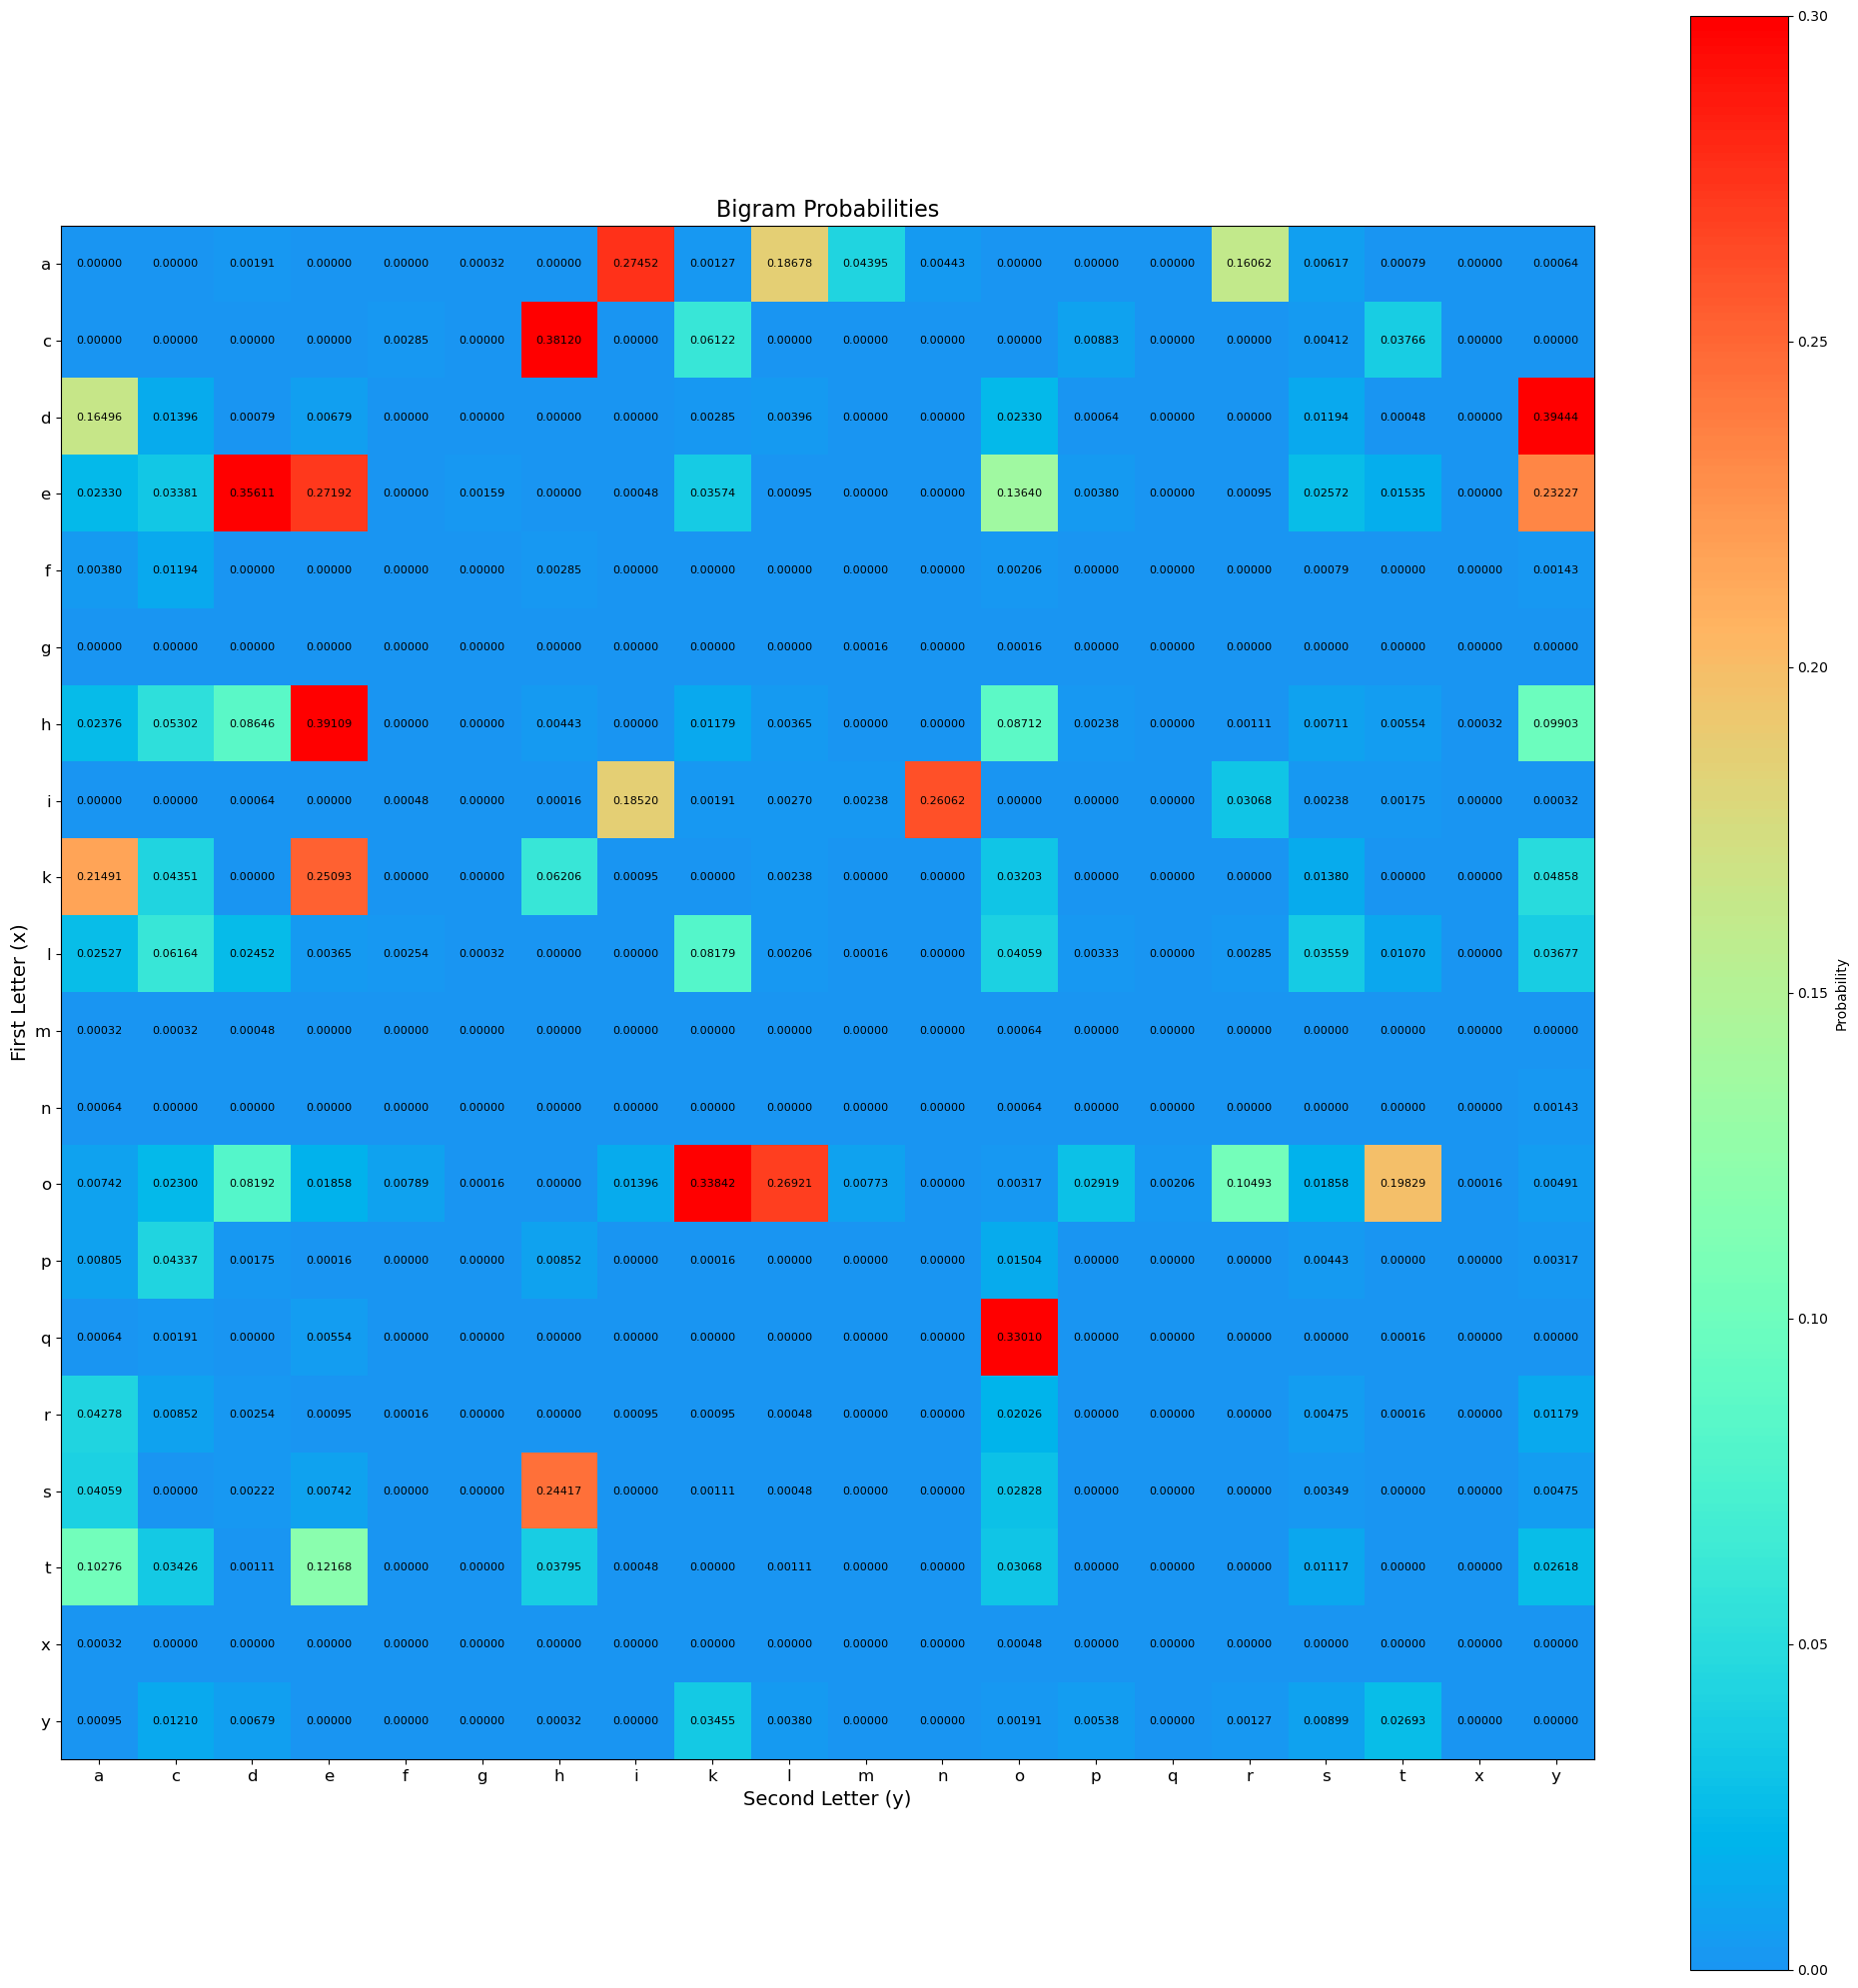

In [26]:
# Extract unique first and second letters from the bigrams in sorted_probabilities
first_letters = sorted(set(pair[0][0] for pair in sorted_probabilities))
second_letters = sorted(set(pair[0][1] for pair in sorted_probabilities))

# Create an empty matrix to store the probabilities
matrix = np.zeros((len(first_letters), len(second_letters)))

# Fill the matrix with probabilities
for i, first_letter in enumerate(first_letters):
    for j, second_letter in enumerate(second_letters):
        bigram = first_letter + second_letter
        probability = next((prob for pair, prob in sorted_probabilities if pair == bigram), 0)
        matrix[i, j] = probability

# Define a custom rainbow colormap for better contrast
rainbow_colors = plt.cm.get_cmap('rainbow', 256)
new_colors = rainbow_colors(np.linspace(0.2, 1, 256))
new_cmap = mcolors.ListedColormap(new_colors)

# Plotting the heatmap with the custom colormap
plt.figure(figsize=(20, 20))  
plt.imshow(matrix, cmap=new_cmap, interpolation='nearest', vmin=0, vmax=0.3)
plt.colorbar(label='Probability')
plt.xticks(np.arange(len(second_letters)), second_letters, fontsize=12)
plt.yticks(np.arange(len(first_letters)), first_letters, fontsize=12)
plt.xlabel('Second Letter (y)', fontsize=14)
plt.ylabel('First Letter (x)', fontsize=14)
plt.title('Bigram Probabilities', fontsize=16)

# Adding the probability values inside the cells with reduced font size
for i in range(len(first_letters)):
    for j in range(len(second_letters)):
        value = f"{matrix[i, j]:.5f}"  # Format values with up to 5 decimal places
        plt.text(j, i, value, ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

Findings of bigrams at a threshold above 0.09

In [27]:
threshold = 0.09
pair_list = []
probability_list = []

for pair, probability in sorted_probabilities:
    if probability > threshold:
        pair_list.append(pair)
        probability_list.append(probability)

print("Pairs with probabilities > 0.09:")
for pair, probability in zip(pair_list, probability_list):
    print(f"{pair}: {probability}")

Pairs with probabilities > 0.09:
dy: 0.39443647116616415
he: 0.39109337620703344
ch: 0.38120453941475796
ed: 0.35610770286463395
ok: 0.3384230077134348
qo: 0.33010474272501567
ai: 0.274524284840582
ee: 0.2719197674553266
ol: 0.2692115449441467
in: 0.2606169659763139
ke: 0.25092637824828123
sh: 0.24417220692722919
ey: 0.232265627862106
ka: 0.2149127736360344
ot: 0.19829378084392812
al: 0.18678291013982848
ii: 0.18520198551043948
da: 0.16496433741980898
ar: 0.16061629661277185
eo: 0.1364029725683045
te: 0.1216837340560779
or: 0.10492746195133756
ta: 0.10275585494298477
hy: 0.09902692787228248


In [28]:
pair_list = [pair for pair, _ in zip(pair_list, probability_list)]
print(pair_list)

['dy', 'he', 'ch', 'ed', 'ok', 'qo', 'ai', 'ee', 'ol', 'in', 'ke', 'sh', 'ey', 'ka', 'ot', 'al', 'ii', 'da', 'ar', 'eo', 'te', 'or', 'ta', 'hy']


## creation of NaiveDiscriminativeLearning class for trigrams

In [29]:
class NaiveDiscriminativeLearning:
    def __init__(self, alpha=1, beta=0.1):
        # Initialize dictionaries to store class, feature, and trigram counts
        self.class_counts = {}
        self.feature_counts = {}
        self.trigram_counts = {}
        # Set alpha and beta hyperparameters
        self.alpha = alpha
        self.beta = beta

    def train(self, text):
        # Split the text into letter pairs (bigrams) and trigrams
        letter_pairs = [text[i:i+2] for i in range(len(text)-1) if ' ' not in text[i:i+2]]
        trigrams = [text[i:i+3] for i in range(len(text)-2) if ' ' not in text[i:i+3]]

        # Count the occurrences of each letter pair and trigram in the text
        pair_counts = Counter(letter_pairs)
        trigram_counts = Counter(trigrams)

        # Update class and feature counts based on the observed letter pairs
        for pair, count in pair_counts.items():
            if pair in self.feature_counts:
                self.feature_counts[pair] += count
            else:
                self.feature_counts[pair] = count

            if pair in self.class_counts:
                self.class_counts[pair] += count
            else:
                self.class_counts[pair] = count

        # Update trigram counts
        for trigram, count in trigram_counts.items():
            if trigram in self.trigram_counts:
                self.trigram_counts[trigram] += count
            else:
                self.trigram_counts[trigram] = count

    def predict(self, text):
        # Split the text into letter pairs (bigrams) and trigrams
        letter_pairs = [text[i:i+2] for i in range(len(text)-1) if ' ' not in text[i:i+2]]
        trigrams = [text[i:i+3] for i in range(len(text)-2) if ' ' not in text[i:i+3]]

        # Calculate probabilities for each letter pair (bigram)
        probabilities = {}
        total_class_count = sum(self.class_counts.values())
        for pair in letter_pairs:
            if pair in self.feature_counts:
                feature_count = self.feature_counts[pair]
                class_count = self.class_counts[pair]
                probability = (feature_count + self.alpha) / (class_count + self.beta * total_class_count)
            else:
                probability = self.alpha / (self.beta * total_class_count)
            probabilities[pair] = probability

        # Calculate probabilities for each trigram (if the length is 3)
        for trigram in trigrams:
            if len(trigram) == 3:  # Condition to output only trigrams
                if trigram in self.trigram_counts:
                    trigram_count = self.trigram_counts[trigram]
                    pair_count = self.feature_counts[trigram[:2]]
                    probability = (trigram_count + self.alpha) / (pair_count + self.beta * total_class_count)
                else:
                    probability = self.alpha / (self.beta * total_class_count)
                probabilities[trigram] = probability

        return probabilities

Function gridsearch described article its algorithm

In [30]:
def grid_search(alpha_values, beta_values, train_text, pair_list):
    # Initialize variables to store the best hyperparameters and average probability score
    best_alpha = None
    best_beta = None
    best_avg_probability = -1

    # Iterate over all combinations of alpha and beta values
    for alpha, beta in product(alpha_values, beta_values):
        # Create an instance of NaiveDiscriminativeLearning with current hyperparameters
        ndl = NaiveDiscriminativeLearning(alpha=alpha, beta=beta)
        # Train the model with the training text
        ndl.train(train_text)

        # Calculate probabilities for selected trigrams (bigram + additional letter)
        selected_trigram_probabilities = []
        additional_letter = 'abcdefghijklmnopqrstuvwxyz'
        for bigram in pair_list:
            for letter in additional_letter:
                trigram = bigram + letter
                probability = ndl.predict(trigram).get(trigram, 0)
                selected_trigram_probabilities.append((trigram, probability))

        # Calculate the average probability for the selected trigrams
        avg_probability = sum(prob for _, prob in selected_trigram_probabilities) / len(selected_trigram_probabilities)

        # If a better average probability is found, update the best hyperparameters and score
        if avg_probability > best_avg_probability:
            best_alpha = alpha
            best_beta = beta
            best_avg_probability = avg_probability

    # Return the best hyperparameters and average probability score
    return best_alpha, best_beta, best_avg_probability

# Example training data and list of bigrams
train_text = train_text
pair_list = pair_list

# Specify values for alpha and beta for the grid search
alpha_values = [0.1, 0.5, 1.0]
beta_values = [0.1, 0.5, 1.0]

# Call the grid_search function to find the optimal alpha and beta values
best_alpha, best_beta, best_avg_probability = grid_search(alpha_values, beta_values, train_text, pair_list)

# Create an instance of the NaiveDiscriminativeLearning class with the optimal hyperparameters
ndl_optimal = NaiveDiscriminativeLearning(alpha=best_alpha, beta=best_beta)

# Train the model on the training data using the optimal hyperparameters
ndl_optimal.train(train_text)

C:\Users\e-yesbolat.sapargali\AppData\Local\Temp\ipykernel_9060\1820300945.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plasma_colors = plt.cm.get_cmap('rainbow', 256)


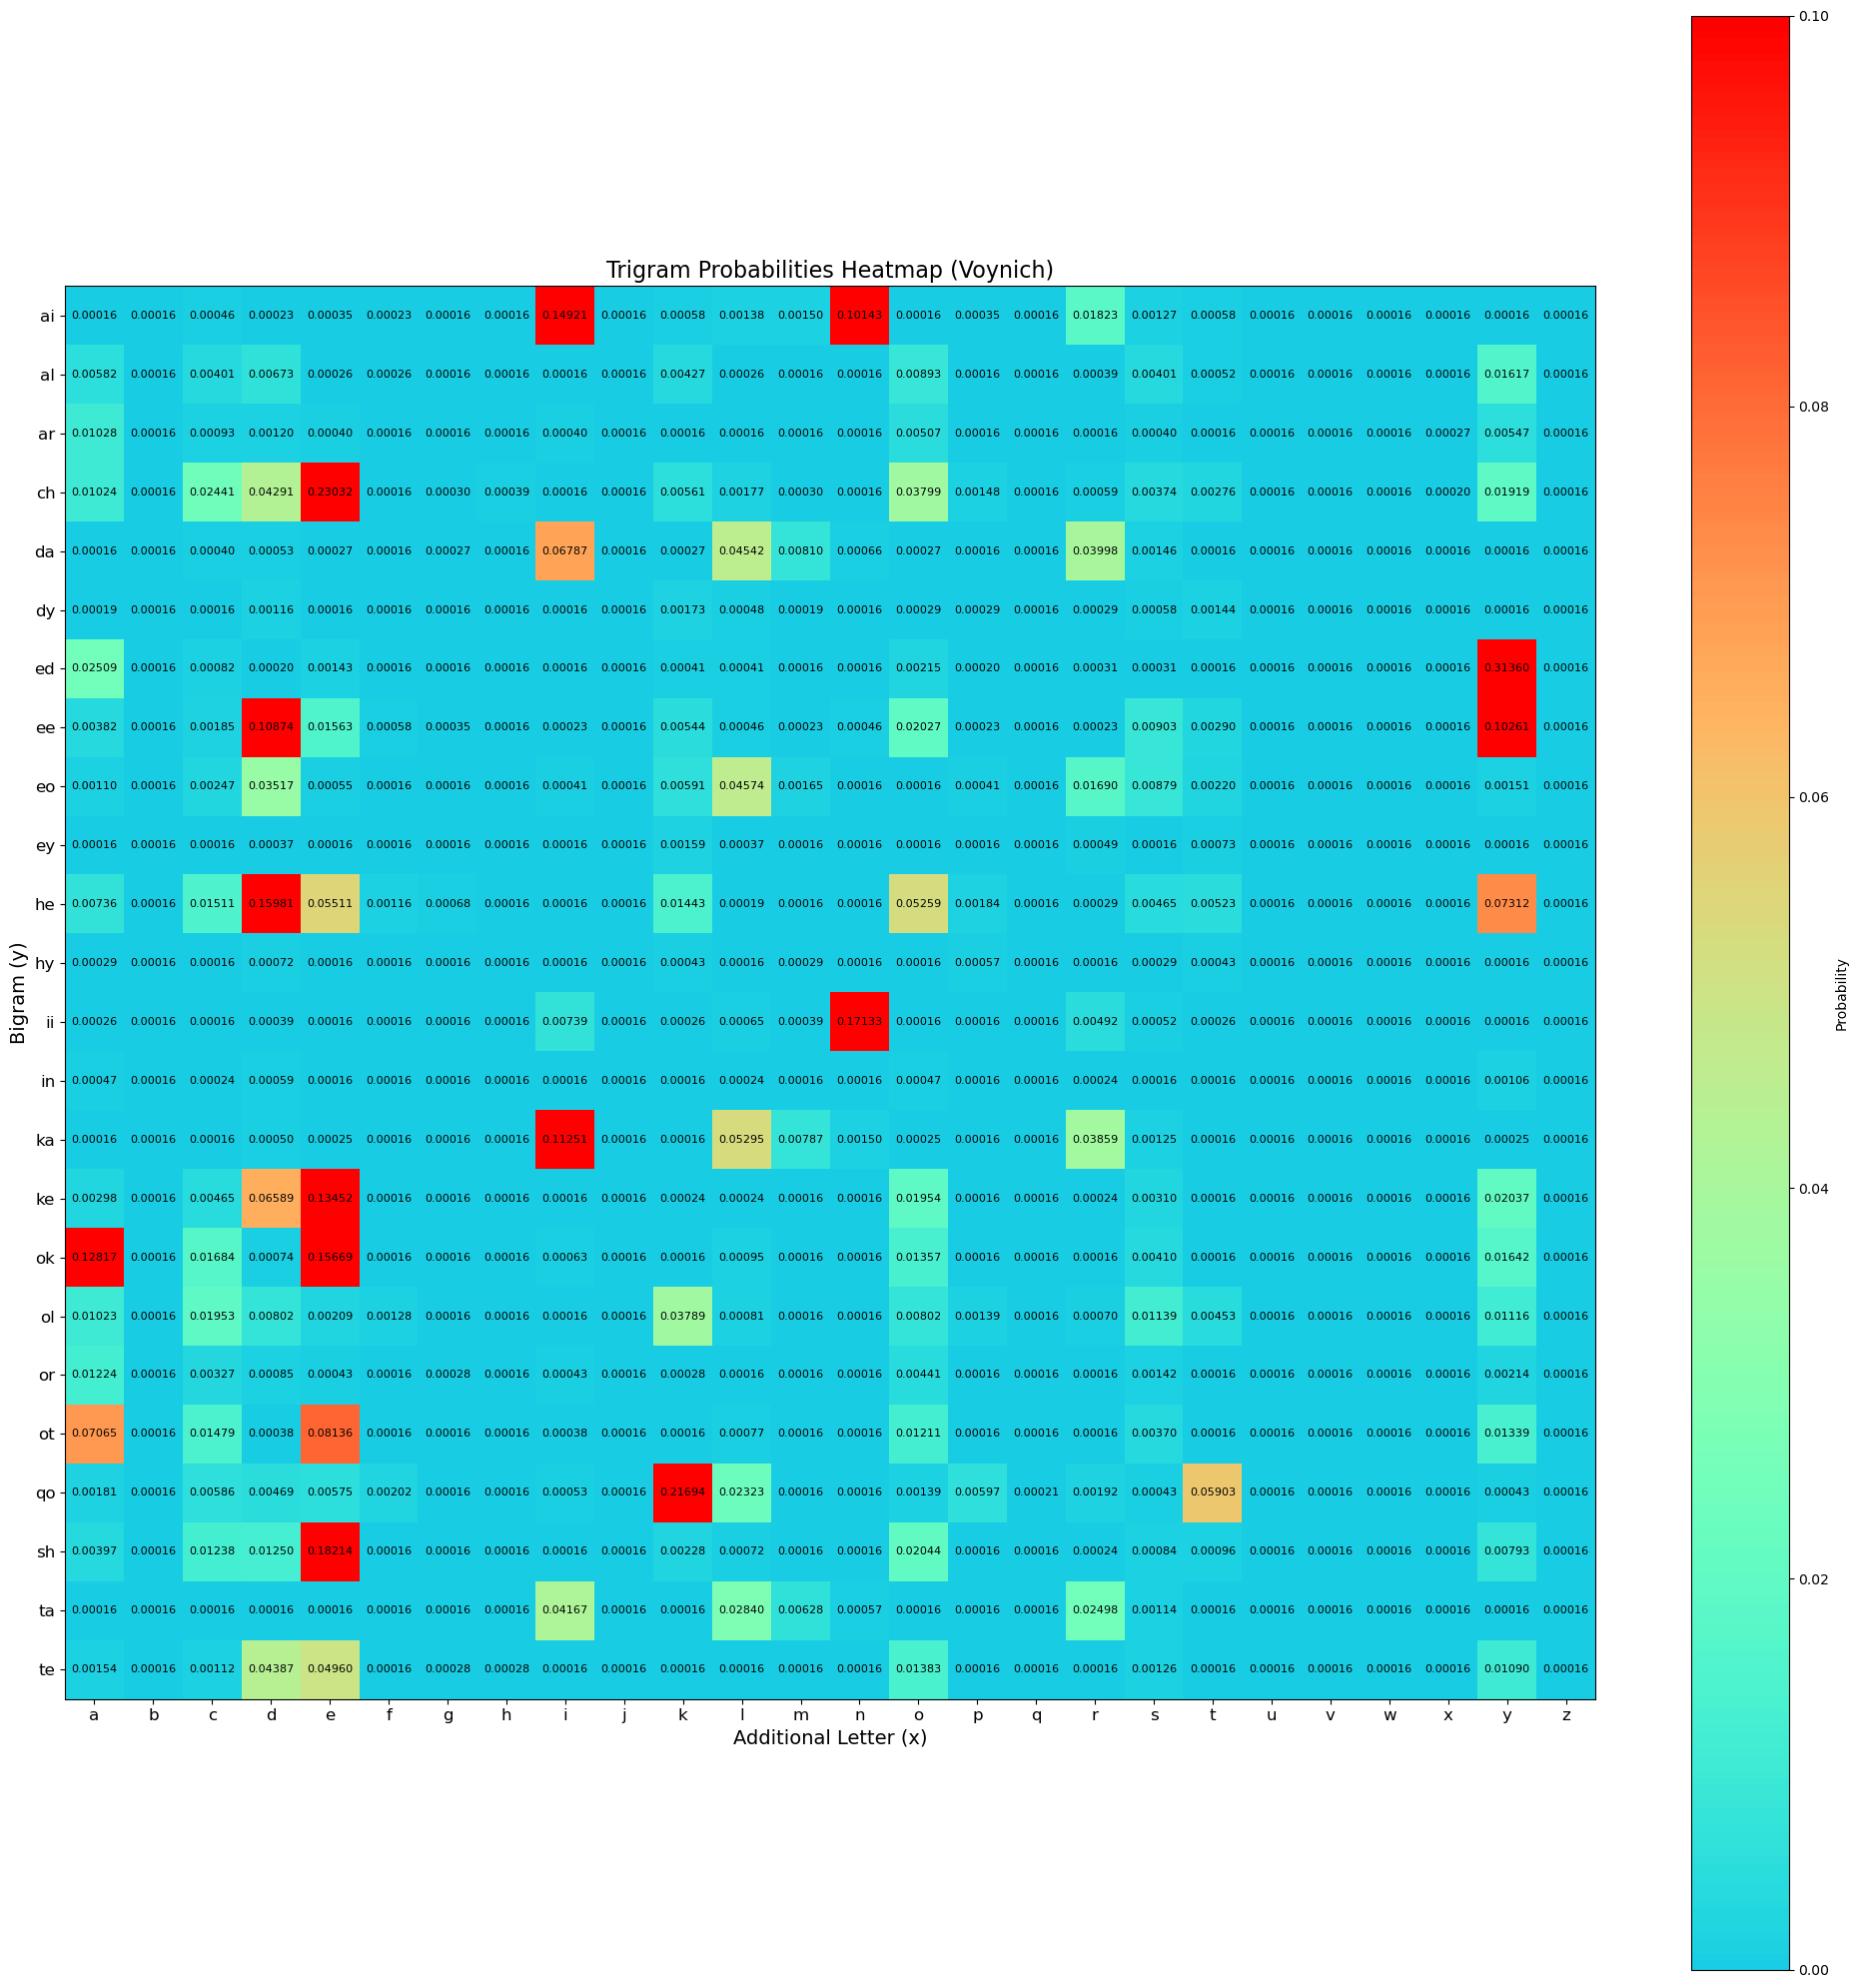

In [32]:
# Extract unique bigrams and additional letters from the trigrams in sorted_probabilities
bigrams_y = sorted(set(trigram[:2] for trigram, _ in sorted_probabilities))
additional_letters_x = sorted(set(trigram[2] for trigram, _ in sorted_probabilities))

# Create an empty 2D matrix to store the probabilities
matrix = np.zeros((len(bigrams_y), len(additional_letters_x)))

# Fill the matrix with probabilities
for i, bigram_y in enumerate(bigrams_y):
    for j, letter_x in enumerate(additional_letters_x):
        trigram = bigram_y + letter_x
        probability = next((prob for tri, prob in sorted_probabilities if tri == trigram), 0)
        matrix[i, j] = probability

# Define a custom plasma colormap for better contrast
plasma_colors = plt.cm.get_cmap('rainbow', 256)
new_colors = plasma_colors(np.linspace(0.3, 1, 256))
new_cmap = mcolors.ListedColormap(new_colors)

# Plotting the heatmap with the custom colormap
plt.figure(figsize=(20, 20))  
plt.imshow(matrix, cmap=new_cmap, interpolation='nearest', vmin=0, vmax=0.1)  
plt.colorbar(label='Probability')
plt.xticks(np.arange(len(additional_letters_x)), additional_letters_x, fontsize=12)
plt.yticks(np.arange(len(bigrams_y)), bigrams_y, fontsize=12)
plt.xlabel('Additional Letter (x)', fontsize=14)
plt.ylabel('Bigram (y)', fontsize=14)
plt.title('Trigram Probabilities Heatmap (Voynich)', fontsize=16)

# Adding the probability values inside the cells with reduced font size
for i, bigram_y in enumerate(bigrams_y):
    for j, letter_x in enumerate(additional_letters_x):
        value = f"{matrix[i, j]:.5f}"  # Format values with up to 5 decimal places
        plt.text(j, i, value, ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

Finding bigrams at above threshold

In [34]:
threshold = 0.05
trigram_list = []
probability_list2 = []

for trigram, probability in sorted_probabilities:
    if probability > threshold:
        trigram_list.append(trigram)
        probability_list2.append(probability)

print("Trigrams with probabilities > 0.05:")
for trigram, probability in zip(trigram_list, probability_list2):
    print(f"{trigram}: {probability}")

Trigrams with probabilities > 0.05:
edy: 0.3136041950450127
che: 0.230317227531767
qok: 0.21694424021566555
she: 0.1821373183135166
iin: 0.1713345170362498
hed: 0.15980784317523655
oke: 0.15668901072304242
aii: 0.14920550664097207
kee: 0.13451846203338533
oka: 0.12817140030937924
kai: 0.11251389253112551
eed: 0.10874474516207482
eey: 0.10260686284728253
ain: 0.10143204975824782
ote: 0.08135783419834479
hey: 0.07312419490745672
ota: 0.07064614442928371
dai: 0.06787180066145121
ked: 0.06588902524753064
qot: 0.05903099660092275
hee: 0.0551094925858846
kal: 0.052947714132294356
heo: 0.052591308390396024


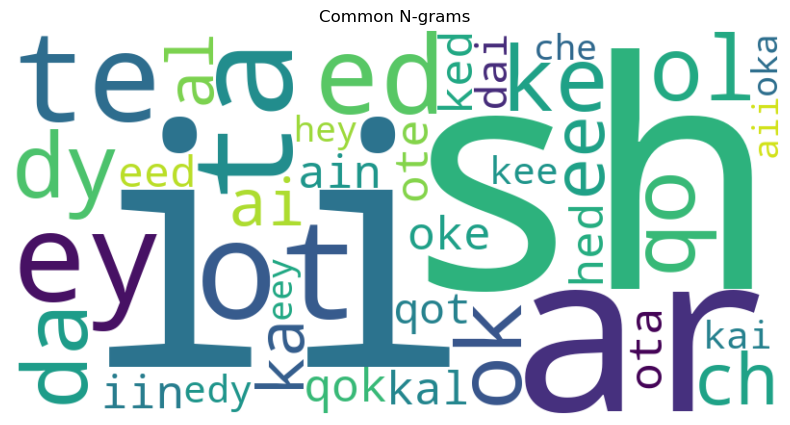

In [36]:
# Combine common bigrams and trigrams into a single list called common_ngrams
common_ngrams = list(common_bigrams) + list(common_trigrams)

# Join the common n-grams to form a single string for creating the word cloud
wordcloud_text = ' '.join(common_ngrams)

# Create a WordCloud object with specified dimensions and background color
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# Display the word cloud visualization
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common N-grams')
plt.show()